In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/raw/train.csv')
df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


# ID
ID is identical to the numeric index so we can just drop it.

In [3]:
df = df.drop('id', axis=1)

In [4]:
from skrub import TableReport

TableReport(df)

Processing column  12 / 12


brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮


# Price


From the quick look at the data, we either have some supercars in the data set, or some bad data.


In [5]:
df[['price']].describe(percentiles=[.05, .1, .25, .5, .75, .9, .95]).T

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max
price,188533.0,43878.016178,78819.522254,2000.0,6999.0,9900.0,17000.0,30825.0,49900.0,78500.0,107900.0,2954083.0


<Axes: >

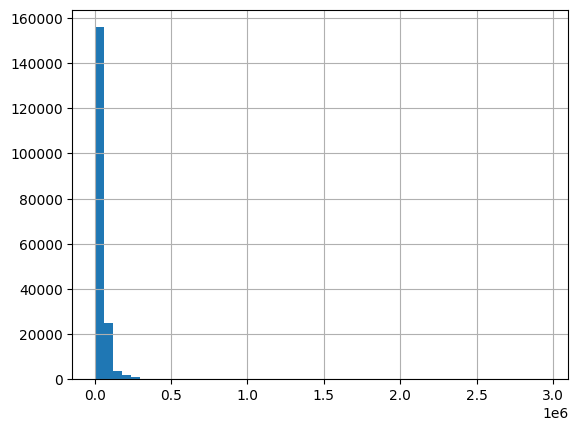

In [6]:
df['price'].hist(bins=50)

5% of the used cars have prices over $107,900. 

In [7]:
df[df['price'] > 130000].sort_values('price', ascending=False)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
67957,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2017,67280,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,2954083
16034,Mercedes-Benz,SL-Class SL500 Roadster,2005,34068,Gasoline,302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Beige,None reported,Yes,2954083
92612,Lexus,ES 350 Base,2008,132252,Gasoline,272.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,At least 1 accident or damage reported,Yes,2954083
181021,Cadillac,DeVille Base,1994,85200,–,–,A/T,Green,Beige,None reported,Yes,2954083
119162,Ford,Bronco Raptor,2023,4285,Gasoline,3.0L V6 24V GDI DOHC Twin Turbo,10-Speed Automatic,Oxford White,Black,None reported,NaN,2954083
...,...,...,...,...,...,...,...,...,...,...,...,...
67417,Chevrolet,Impala 2LZ,2014,89000,Gasoline,305.0HP 3.6L V6 Cylinder Engine Gasoline Fuel,5-Speed A/T,Orange,Black,None reported,Yes,131000
139598,Porsche,911 Carrera,2016,12088,Gasoline,379.0HP 3.0L Flat 6 Cylinder Engine Gasoline Fuel,A/T,Black,Black,None reported,Yes,131000
104591,Mercedes-Benz,AMG G 63 4MATIC,2020,10900,Gasoline,577.0HP 4.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Black,NaN,NaN,131000
116652,Porsche,911 Carrera S,2013,13500,Gasoline,400.0HP 3.8L Flat 6 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Black,None reported,Yes,131000


Weird, it seems like some values are repeated, maybe a condition of the data being artificial.

In [8]:
df[df.price == 2954083]

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
220,Ford,F-150 XLT,2021,26315,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,Agate Black Metallic,Black,None reported,Yes,2954083
1880,Chrysler,300C Base,2003,55900,Gasoline,340.0HP 5.7L 8 Cylinder Engine Gasoline Fuel,5-Speed A/T,Beige,Beige,None reported,Yes,2954083
13838,Toyota,Highlander SE,2014,85000,Gasoline,3.5L V6 24V PDI DOHC,8-Speed Automatic,Green,Black,None reported,Yes,2954083
14693,Hyundai,Santa Fe SEL,2022,13865,Gasoline,2.5L I4 16V PDI DOHC,8-Speed Automatic,Black,Black,None reported,Yes,2954083
16034,Mercedes-Benz,SL-Class SL500 Roadster,2005,34068,Gasoline,302.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,7-Speed A/T,White,Beige,None reported,Yes,2954083
18946,Audi,S4 Base,2004,73500,Gasoline,340.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed M/T,Blue,Beige,None reported,Yes,2954083
21814,RAM,1500 Laramie,2022,16156,Gasoline,5.7L V8 16V MPFI OHV,8-Speed Automatic,Diamond Black,Black,None reported,NaN,2954083
36615,Ford,Excursion Limited Ultimate,2002,89900,Diesel,325.0HP 6.0L 8 Cylinder Engine Diesel Fuel,5-Speed A/T,Gold,Gold,None reported,Yes,2954083
42177,Ford,Mustang GT,2005,82000,Gasoline,300.0HP 4.6L 8 Cylinder Engine Gasoline Fuel,5-Speed M/T,Silver,Black,None reported,Yes,2954083
42219,Land,Rover Range Rover 3.0L V6 Supercharged HSE,2021,29850,Gasoline,380.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,Black,None reported,Yes,2954083


# Brand



In [9]:
df['brand'].value_counts()

brand
Ford             23088
Mercedes-Benz    19172
BMW              17028
Chevrolet        16335
Audi             10887
Porsche          10612
Land              9525
Toyota            8850
Lexus             8643
Jeep              6474
Cadillac          4674
RAM               4249
Nissan            3930
Tesla             3738
INFINITI          3276
GMC               3215
Dodge             3133
Mazda             2719
Kia               2497
Lincoln           2423
Subaru            2381
Acura             2282
Honda             2101
Hyundai           2045
Volkswagen        1765
Jaguar            1319
Bentley           1155
MINI              1064
Genesis            969
Buick              940
Maserati           939
Lamborghini        809
Chrysler           727
Volvo              723
Alfa               682
Rivian             590
Rolls-Royce        561
Mitsubishi         551
Pontiac            538
Hummer             520
Ferrari            359
McLaren            243
Aston              238
Satur

In [10]:
df['engine'][:10]

0         172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel
1         252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel
2    320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
3         420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel
4         208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
5         252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
6        333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
7    355.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...
8                      2.7L V6 24V PDI DOHC Twin Turbo
9    425.0HP 3.0L Straight 6 Cylinder Engine Gasoli...
Name: engine, dtype: object

# Fuel Type

We have two problems with the fuel_type data:
- There are 2.7% missing values, 5083 in total.
- There are multiple 'unknown' values - a '-' and a 'not supported' value.

In [11]:
mask = df['fuel_type'].isna()
(df[mask].groupby('brand').size() / len(df[mask])).sort_values(ascending=False)


brand
Tesla            0.661224
Rivian           0.097777
Ford             0.084006
Porsche          0.037380
Audi             0.023805
Mercedes-Benz    0.012001
BMW              0.011804
Nissan           0.011017
Kia              0.010624
Lucid            0.010230
Chevrolet        0.008460
Hyundai          0.005705
Volkswagen       0.005509
Toyota           0.003148
Karma            0.002361
Volvo            0.001771
Acura            0.001574
Dodge            0.001377
Cadillac         0.001377
Polestar         0.000984
GMC              0.000984
Jeep             0.000787
Land             0.000787
MINI             0.000590
Jaguar           0.000393
Genesis          0.000393
FIAT             0.000393
RAM              0.000393
Bentley          0.000393
Pontiac          0.000393
INFINITI         0.000393
Lamborghini      0.000197
Mitsubishi       0.000197
McLaren          0.000197
Maserati         0.000197
Lotus            0.000197
Lincoln          0.000197
Alfa             0.000197
Ferrar

We can see that Tesla and Rivian are missing the most, so those are probably missing because they are electric vehicles. Given the other options are ['Gasoline', 'Hybrid', 'E85 Flex Fuel', 'Diesel', 'Plug-in Hybrid'], it's possible that people didn't know how to classify a fully electric vehicle under those categories.

In [12]:
mask = df['fuel_type'] == 'not supported'
df[mask].groupby(['brand', 'model']).size()

brand      model               
Chevrolet  Silverado 1500 RST      1
           Suburban LT             1
Hummer     H2 Base                 1
Lexus      IS 350 F Sport          1
           Mirai Limited           1
           RX 330 Base             1
Mazda      MX-5 Miata Base         1
Nissan     Mirai Limited           2
Porsche    Camaro 2SS              1
           Cayenne Turbo GT        1
Subaru     Outback 2.5i Limited    1
Toyota     Mirai Limited           3
dtype: int64

In [13]:
df['fuel_type'].value_counts()

fuel_type
Gasoline          165940
Hybrid              6832
E85 Flex Fuel       5406
Diesel              3955
–                    781
Plug-In Hybrid       521
not supported         15
Name: count, dtype: int64